# Part A

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# To display plots inline
%matplotlib inline

## Load Datasets

In [ ]:
# Load regression and classification datasets

# Regression dataset - Housing
housing = pd.read_csv("housing.csv")

# Classification dataset - Iris
iris = pd.read_csv("Iris.csv")

# Display first few rows
print("🏠 Housing Dataset (Regression):")
display(housing.head())

print("\n🌸 Iris Dataset (Classification):")
display(iris.head())

🏠 Housing Dataset (Regression):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



🌸 Iris Dataset (Classification):


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect Shapes & Feature Names

In [ ]:
# Shapes and columns of both datasets

print("Housing Dataset Shape:", housing.shape)
print("Housing Features:", housing.columns.tolist(), "\n")

print("Iris Dataset Shape:", iris.shape)
print("Iris Features:", iris.columns.tolist())


Housing Dataset Shape: (20640, 10)
Housing Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'] 

Iris Dataset Shape: (150, 6)
Iris Features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


## Basic Statistics (.describe())

In [ ]:
# Descriptive statistics for numeric features
print("🏠 Housing Dataset Description:\n")
display(housing.describe())

print("\n🌸 Iris Dataset Description:\n")
display(iris.describe())

🏠 Housing Dataset Description:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



🌸 Iris Dataset Description:



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check Missing Values

In [ ]:
# Check for null/missing values
print("🏠 Missing Values in Housing Dataset:\n", housing.isnull().sum())
print("\n🌸 Missing Values in Iris Dataset:\n", iris.isnull().sum())

🏠 Missing Values in Housing Dataset:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

🌸 Missing Values in Iris Dataset:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Feature Scaling (StandardScaler)

In [ ]:
# Scale numeric features where appropriate

scaler = StandardScaler()

# For housing dataset, exclude categorical column 'ocean_proximity'
housing_numeric = housing.drop(columns=['ocean_proximity'])
housing_scaled = pd.DataFrame(
    scaler.fit_transform(housing_numeric),
    columns=housing_numeric.columns
)

# For iris dataset, remove 'Id' and 'Species' before scaling
iris_features = iris.drop(columns=['Id', 'Species'])
iris_scaled = pd.DataFrame(
    scaler.fit_transform(iris_features),
    columns=iris_features.columns
)

print("✅ Housing numeric features scaled shape:", housing_scaled.shape)
print("✅ Iris numeric features scaled shape:", iris_scaled.shape)

✅ Housing numeric features scaled shape: (20640, 9)
✅ Iris numeric features scaled shape: (150, 4)


## Visualizations

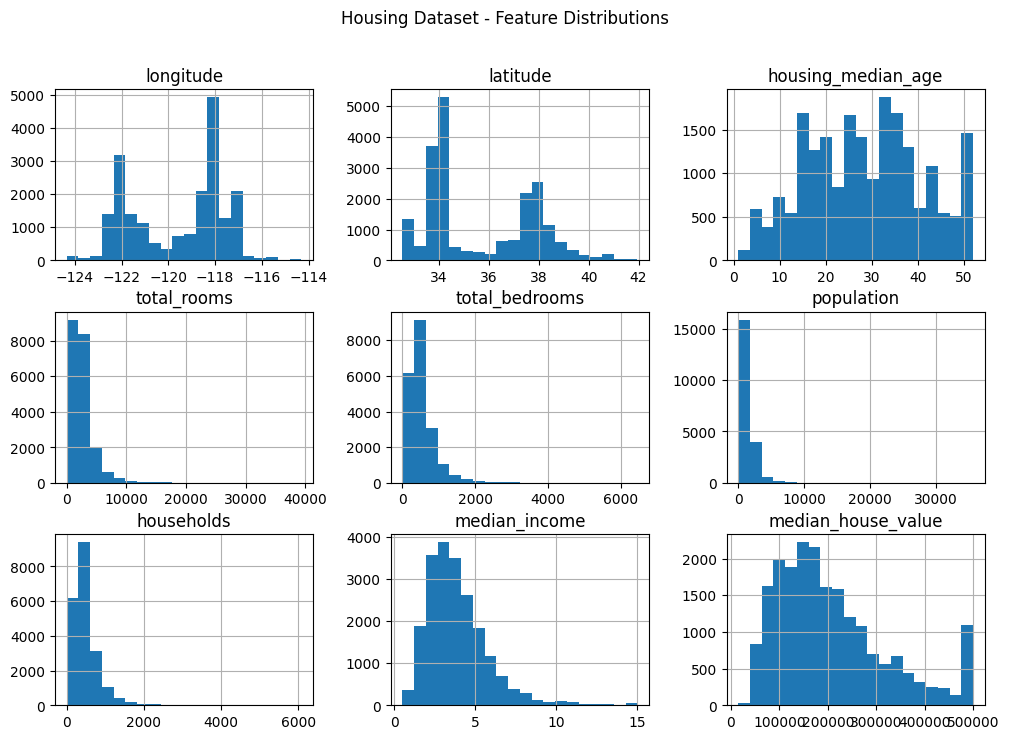

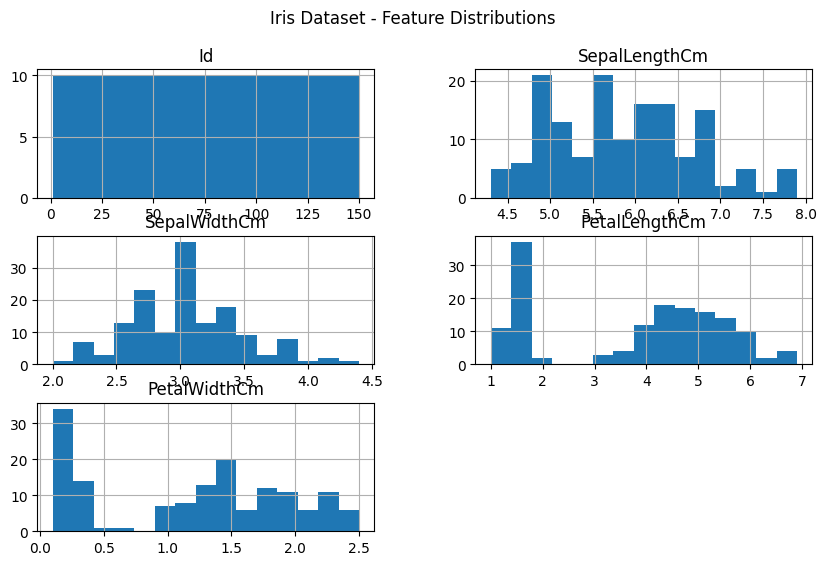

In [ ]:
# Histograms for Housing dataset
housing.hist(bins=20, figsize=(12,8))
plt.suptitle("Housing Dataset - Feature Distributions")
plt.show()

# Histograms for Iris dataset
iris.hist(bins=15, figsize=(10,6))
plt.suptitle("Iris Dataset - Feature Distributions")
plt.show()

### Pairplot (Iris)

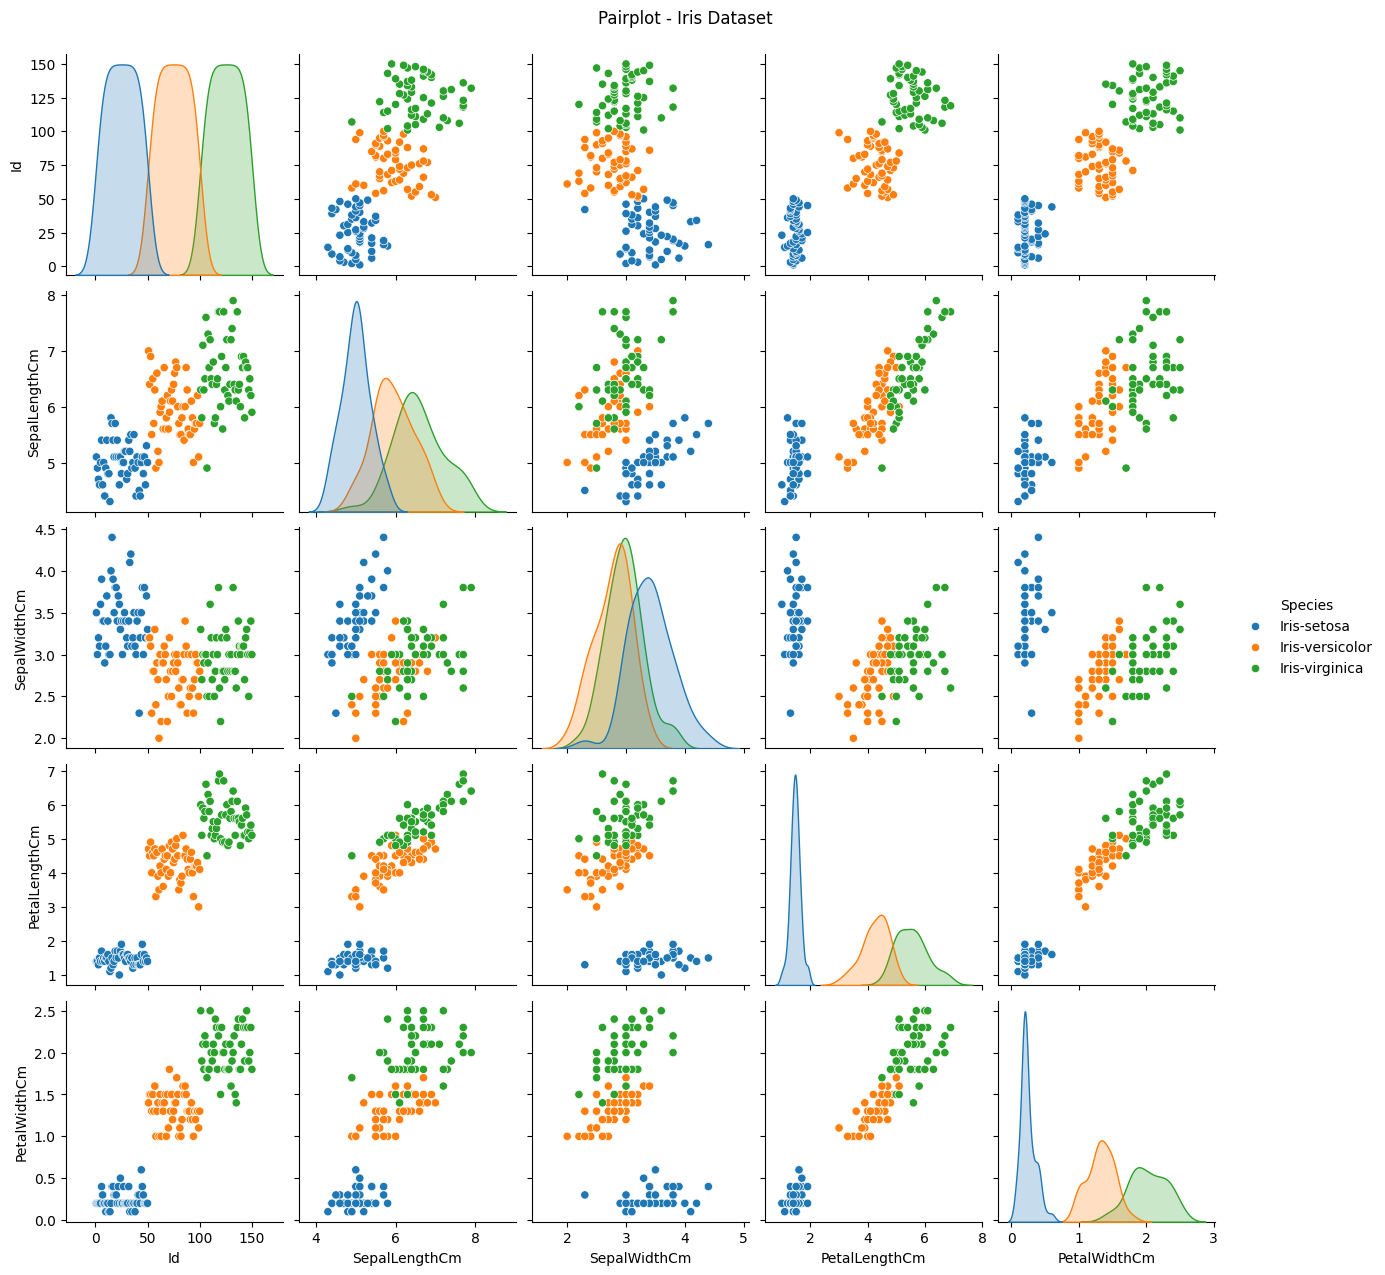

In [ ]:
# Pairplot for Iris dataset
sns.pairplot(iris, hue="Species", diag_kind="kde")
plt.suptitle("Pairplot - Iris Dataset", y=1.02)
plt.show()

### Correlation Heatmap (Housing)

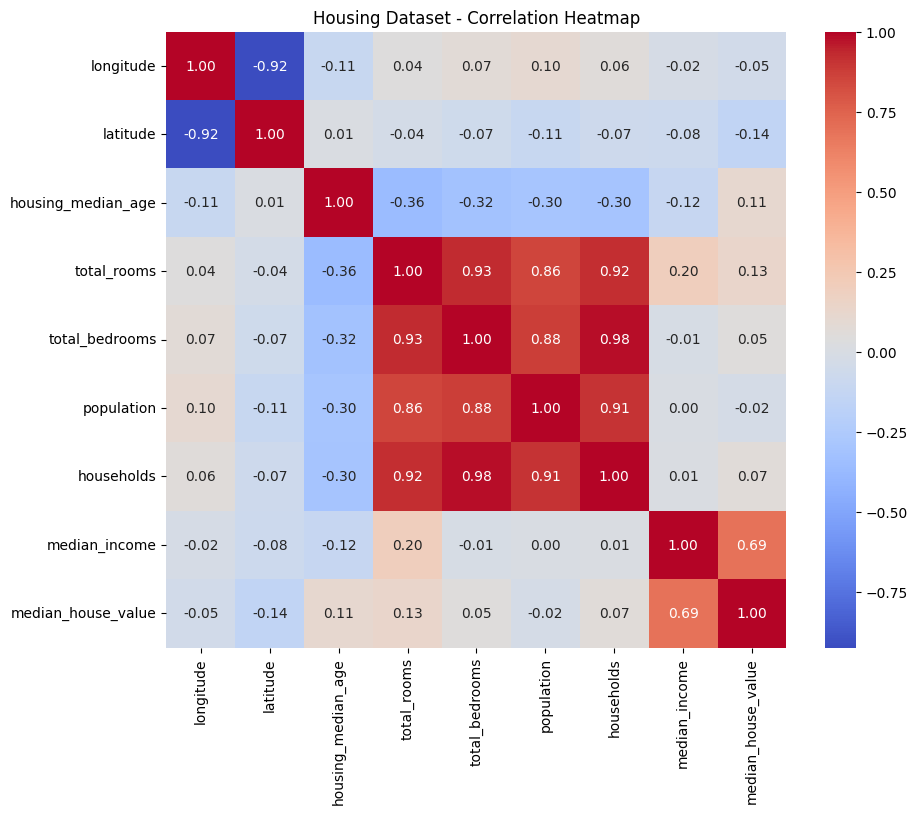

In [ ]:
# Correlation matrix for Housing numeric features
plt.figure(figsize=(10,8))
sns.heatmap(housing_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Housing Dataset - Correlation Heatmap")
plt.show()

## Part B

In [ ]:
# Regression and evaluation modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


## Handle Missing Values & Prepare Data

In [ ]:
# Fill missing total_bedrooms with median
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

# Select features (drop categorical and target)
X = housing.drop(columns=["median_house_value", "ocean_proximity"])
y = housing["median_house_value"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-1596506161.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)


## Linear Regression

In [ ]:
# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → MSE: {mse_lr:.2f},  R²: {r2_lr:.4f}")


Linear Regression → MSE: 5059928371.17,  R²: 0.6139


## Polynomial Regression (Degree 2)

In [ ]:
# Polynomial feature transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test  = poly.transform(X_test)

# Fit polynomial regression
pr = LinearRegression()
pr.fit(X_poly_train, y_train)

# Predictions
y_pred_pr = pr.predict(X_poly_test)

# Evaluation metrics
mse_pr = mean_squared_error(y_test, y_pred_pr)
r2_pr = r2_score(y_test, y_pred_pr)

print(f"Polynomial Regression (deg=2) → MSE: {mse_pr:.2f},  R²: {r2_pr:.4f}")

Polynomial Regression (deg=2) → MSE: 4658060261.30,  R²: 0.6445


## Actual vs Predicted Plots

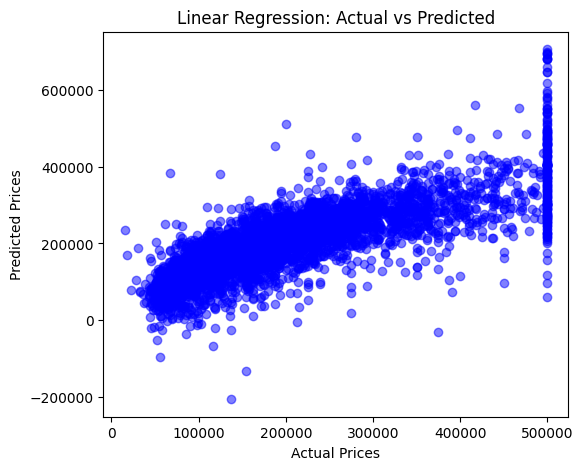

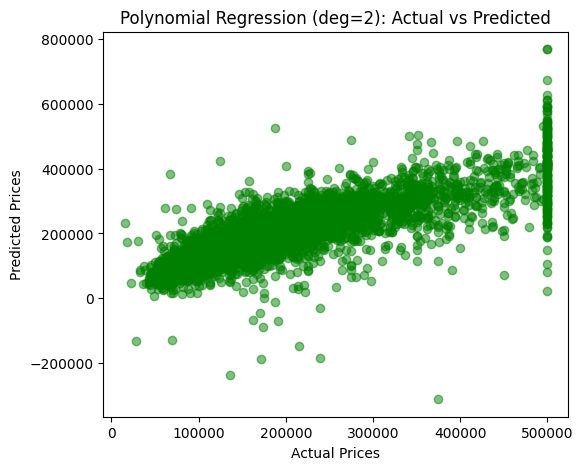

In [ ]:
# Scatter: Actual vs Predicted for Linear
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# Scatter: Actual vs Predicted for Polynomial
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_pr, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Polynomial Regression (deg=2): Actual vs Predicted")
plt.show()


## Compare Performance

In [ ]:
print("📈 Regression Model Comparison\n")
print(f"Linear Regression → MSE: {mse_lr:.2f},  R²: {r2_lr:.4f}")
print(f"Polynomial Regression (deg=2) → MSE: {mse_pr:.2f},  R²: {r2_pr:.4f}")

if r2_pr > r2_lr:
    print("\n✅ Polynomial regression improved performance slightly.")
else:
    print("\n⚠️ Polynomial regression did not significantly improve performance (possible overfitting).")


📈 Regression Model Comparison

Linear Regression → MSE: 5059928371.17,  R²: 0.6139
Polynomial Regression (deg=2) → MSE: 4658060261.30,  R²: 0.6445

✅ Polynomial regression improved performance slightly.


# Part C

In [ ]:
# Import required libraries for SVM classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Prepare Data (Features & Target)

In [ ]:
# Drop unnecessary 'Id' column
iris_data = iris.drop(columns=['Id'])

# Separate features and target
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize Features

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


NameError: name 'StandardScaler' is not defined

## Train Linear and RBF SVM Models

In [ ]:
# Linear SVM
svm_lin = SVC(kernel='linear', C=1)
svm_lin.fit(X_train_s, y_train)

# Non-linear (RBF) SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_s, y_train)

SVC(C=1)

## Predictions and Evaluation

In [ ]:
# Predictions
y_pred_lin = svm_lin.predict(X_test_s)
y_pred_rbf = svm_rbf.predict(X_test_s)

# Evaluation
print("📈 Linear SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))

print("\n\n🌈 RBF SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

📈 Linear SVM Results:
Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


🌈 RBF SVM Results:
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Conf

## Confusion Matrix Heatmaps

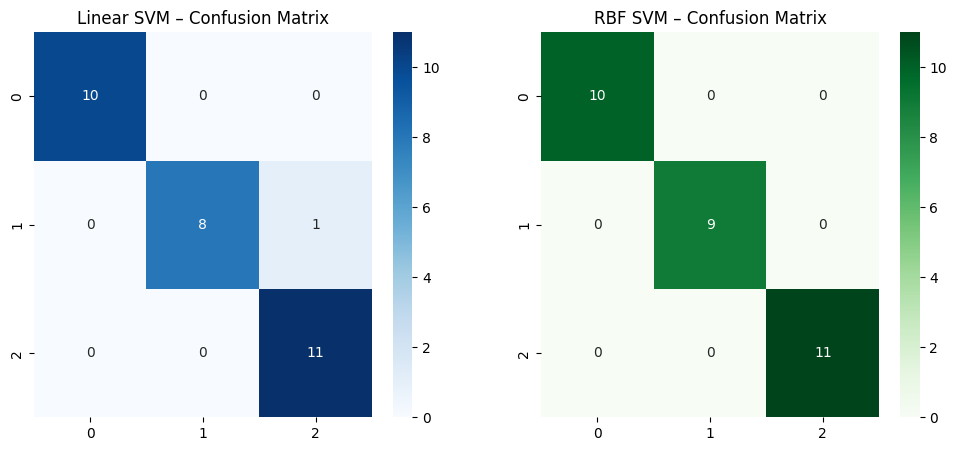

In [ ]:
# Heatmaps for visual comparison
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lin), annot=True, cmap='Blues', fmt='d')
plt.title("Linear SVM – Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, cmap='Greens', fmt='d')
plt.title("RBF SVM – Confusion Matrix")

plt.show()

## 🧠 Part D — Discussion & Conclusion

### 🔹 Regression Models Comparison
- **Linear Regression**
  - MSE: 5.06 × 10⁹  
  - R²: 0.6139  
  - Performed decently, showing that a linear relationship explains about 61% of the variance in house prices.
- **Polynomial Regression (Degree = 2)**
  - MSE: 4.66 × 10⁹  
  - R²: 0.6445  
  - Slight improvement (~3%) in R² and lower MSE, indicating the presence of some non-linear patterns in the data.

**Conclusion (Regression):**  
Polynomial Regression performed a bit better than Linear Regression, but the difference is small.  
This means the California Housing dataset is mostly linear, with limited non-linear behavior.  

---

### 🔹 Classification Models Comparison
- **Linear SVM**
  - Accuracy = 96.67%  
  - One sample misclassified between _Iris-versicolor_ and _Iris-virginica_.  
- **RBF SVM**
  - Accuracy = 100%  
  - No misclassifications; perfect precision, recall and F1 scores.

**Conclusion (Classification):**  
RBF SVM clearly outperformed Linear SVM because the Iris data is not perfectly linearly separable.  
The kernel trick allowed RBF SVM to map data into a higher-dimensional space, capturing complex boundaries.  

---

### 🔹 When Linear Models Suffice vs. When Kernel Helps
- **Linear models suffice** when the relationship between features and target is roughly linear, as seen in the housing data.  
- **Kernel methods** (e.g., RBF, Polynomial) are powerful when the data is non-linear, as in the Iris classification problem.

---

### 🔹 Possible Improvements
- **Feature Engineering:** Create interaction terms and domain-specific features for housing data.  
- **Cross-Validation:** Use `KFold` or `StratifiedKFold` for more robust model evaluation.  
- **Hyperparameter Tuning:** Apply `GridSearchCV` to optimize C, gamma, and kernel for SVM and degree for Polynomial Regression.  
- **Outlier Analysis:** Detect and handle outliers to reduce MSE in regression.  

---

✅ **Final Takeaway:**  
Linear models offer simplicity and interpretability but may miss non-linear patterns.  
Kernel methods like RBF SVM can capture complex relationships and deliver higher accuracy on non-linear datasets.
